#Importo le librerie e i pacchetti necessari

In [ ]:
import numpy as np
import pandas as pd

!pip install tbats
from tbats import TBATS, BATS

import matplotlib.pyplot as plt
 
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 51kB 2.3MB/s 
     |████████████████████████████████| 1.5MB 6.9MB/s 
     |████████████████████████████████| 2.1MB 23.2MB/s 
     |████████████████████████████████| 9.5MB 36.2MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


# Definisco alcune funzioni

In [ ]:
#Mean Absolute Error 
def mean_absolute_error(y_true, y_pred): 
  return round(np.mean(np.abs(y_true - y_pred)), 1)

In [ ]:
def plot_finale(train, validation):
  # prediction on TRAIN
  plt.figure(figsize=(25, 5))
  plt.title('Prediction on TRAIN')
  plt.plot(train['Value'], color='dimgrey', label='Real')
  plt.plot(train['predicted_train'], color='darkred', label='Predect', alpha=0.7)
  plt.ylabel('Value')
  plt.legend()
  plt.show()

  # prediction on TRAIN and VALIDATION
  plt.figure(figsize=(25, 5))
  plt.title('Prediction on TRAIN and VALIDATION')
  plt.plot(train['Value'], color='dimgrey', label='Train')
  plt.plot(validation['Value'], color='darkblue', label='Real')
  plt.plot(validation['predicted_val'], color='tomato', label='Predect', alpha=0.7)
  plt.ylabel('Value')
  plt.legend()
  plt.show()

  # prediction on VALIDATION
  plt.figure(figsize=(25, 5))
  plt.title('Prediction on VALIDATION')
  plt.plot(validation['Value'], color='darkblue', label='Validation')
  plt.plot(validation['predicted_val'], color='tomato', label='Predect', alpha=0.9)
  plt.ylabel('Value')
  plt.legend()
  plt.show()

  # figure on the first part of VALIDATION
  plt.figure(figsize=(25, 5))
  plt.title('Focus on the first part of VALIDATION')
  plt.plot(validation['Value'][:800], color='darkblue', label='Real')
  plt.plot(validation['predicted_val'][:800], color='tomato', label='Predect', alpha=0.9)
  plt.ylabel('Value')
  plt.legend()
  plt.show()

  # figure on the last part of VALIDATION
  plt.figure(figsize=(25, 5))
  plt.title('Focus on the last part of VALIDATION')
  plt.plot(validation['Value'][2000:], color='darkblue', label='Real')
  plt.plot(validation['predicted_val'][2000:], color='tomato', label='Predect', alpha=0.9)
  plt.ylabel('Value')
  plt.legend()
  plt.show()

# Importo i dati

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/MAGISTRALE/2 anno/1 semestre/streaming data management/progetto')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('data_complete.csv', sep=',', header=0, low_memory=False, parse_dates=['Date_Hour'])
data.set_index('Date_Hour', inplace=True)
data.index.freq='H'

In [ ]:
#Train / validation split
train=data.loc[:"2020-04-30 23:00:00"]
validation=data.loc["2020-05-01 00:00:00":]


Esistono due interessanti metodi di previsione delle serie temporali chiamati BATS e TBATS [[1]](https://www.tandfonline.com/doi/abs/10.1198/jasa.2011.tm09771) che sono in grado di modellare serie temporali con più stagionalità.
I nomi sono acronimi per le caratteristiche chiave dei modelli: stagionalità trigonometrica, trasformazione Box-Cox, errori ARMA, componenti di trend e stagionalità.
Ogni stagionalità è modellata da una rappresentazione trigonometrica basata sulle serie di Fourier. BATS differisce da TBATS solo per il modo in cui modella gli effetti stagionali. BATS può modellare solo lunghezze di periodi interi e se la stagionalità è lunga il modello potrebbe diventare intrattabile. Costruisco quindi un modello TBATS.
TBATS prova una moltitudine di modelli ed è lento (nel nostro caso la serie temporale è molto lunga). Per velocizzarlo quindi costruisco un primo modello senza la trasformazione Box-Cox e la modellazione degli errori ARMA che sono gli elementi del modello più lenti.

# Modello senza la trasformazione Box-Cox e la modellazione degli errori ARMA

In [ ]:
model1 = TBATS(
    seasonal_periods=[24, 168, 8766],
    #use_arma_errors=False,  shall try only models without ARMA
    use_box_cox=False  # will not use Box-Cox
    )

model1 = model1.fit(train['Value'])

In [ ]:
print(model1.summary())

Use Box-Cox: False
Use trend: True
Use damped trend: True
Seasonal periods: [  24.  168. 8766.]
Seasonal harmonics [11  6  1]
ARMA errors (p, q): (0, 0)
Smoothing (Alpha): 1.505726
Trend (Beta): -0.204797
Damping Parameter (Phi): 0.837434
Seasonal Parameters (Gamma): [-1.93241120e-06 -4.09026863e-07 -4.38839560e-09 -2.67275809e-06
 -1.77582392e-07  6.93003547e-06]
AR coefficients []
MA coefficients []
Seed vector [ 1.78051699e+07 -1.05606535e+05 -2.63118015e+05  9.75578949e+04
 -1.31188696e+05 -1.00328201e+05  2.22665294e+04  3.12627630e+04
 -3.34269964e+04  1.01017082e+04 -1.73946499e+04  1.31416334e+04
  5.62186255e+03 -1.13744078e+06 -8.27590566e+05  9.97266252e+04
 -2.19534066e+04 -2.47303528e+04  2.18779194e+03 -1.59789437e+04
  1.11315494e+04 -8.30552939e+02  1.25047646e+04  2.75240785e+03
 -7.44030828e+04  1.01829752e+05  5.09111565e+04 -5.32332234e+04
 -1.70003464e+04  8.15341259e+04 -1.99676746e+05 -1.07364998e+05
  3.66942788e+04  9.44229926e+03 -9.26231269e+04 -5.49761885e+0

In [ ]:
validation['predicted_val'] = model1.forecast(steps=2952)
train['predicted_train'] = model1.y_hat

In [ ]:
print("MAE train:", mean_absolute_error(train['Value'], train['predicted_train']))
print("MAE validation:", mean_absolute_error(validation['Value'], validation['predicted_val']))

MAE train: 122310.2
MAE validation: 11117210.2


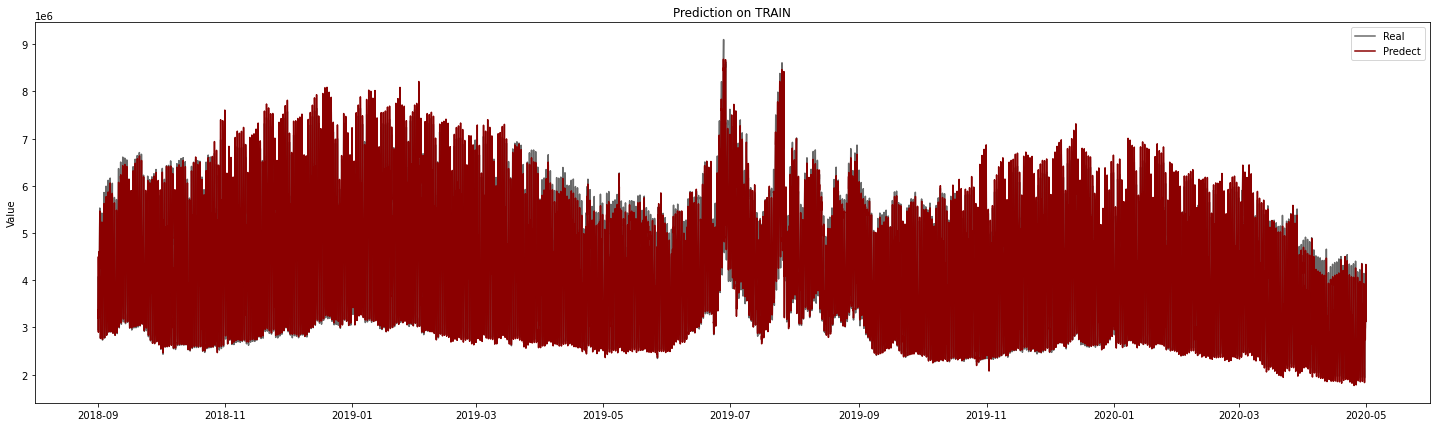

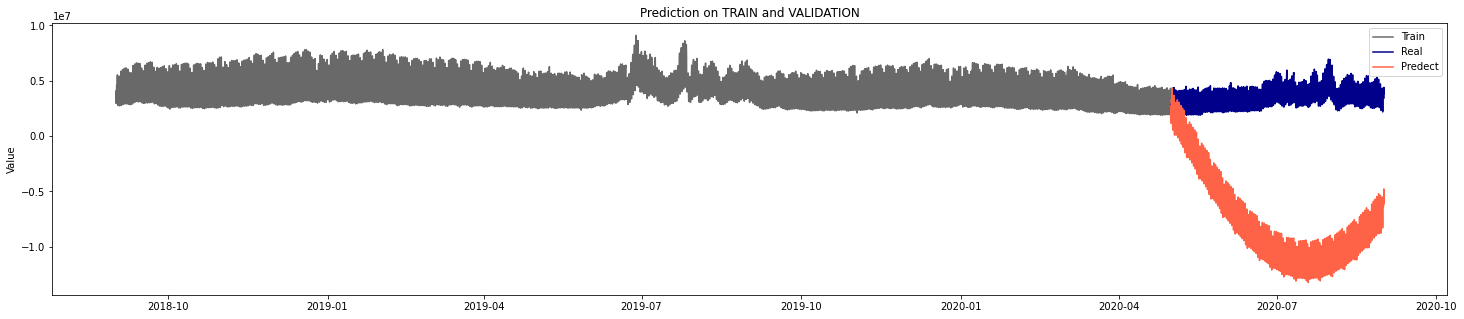

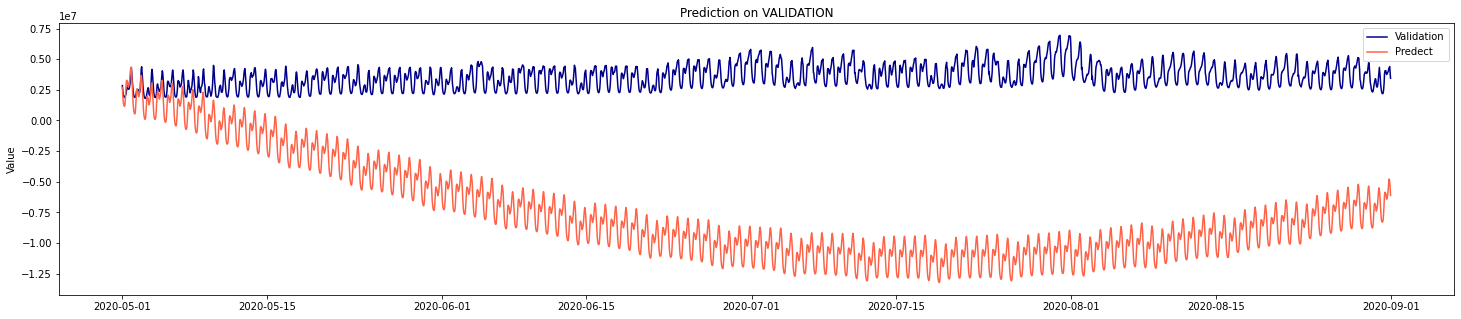

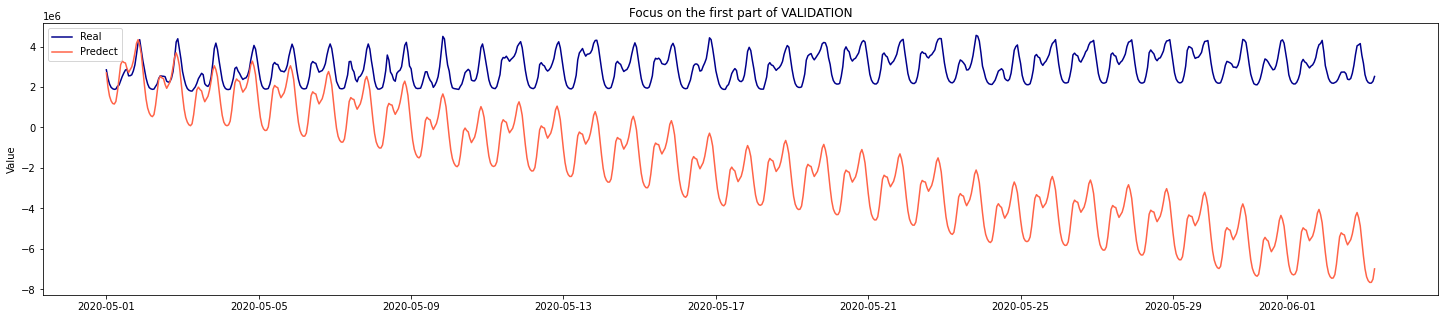

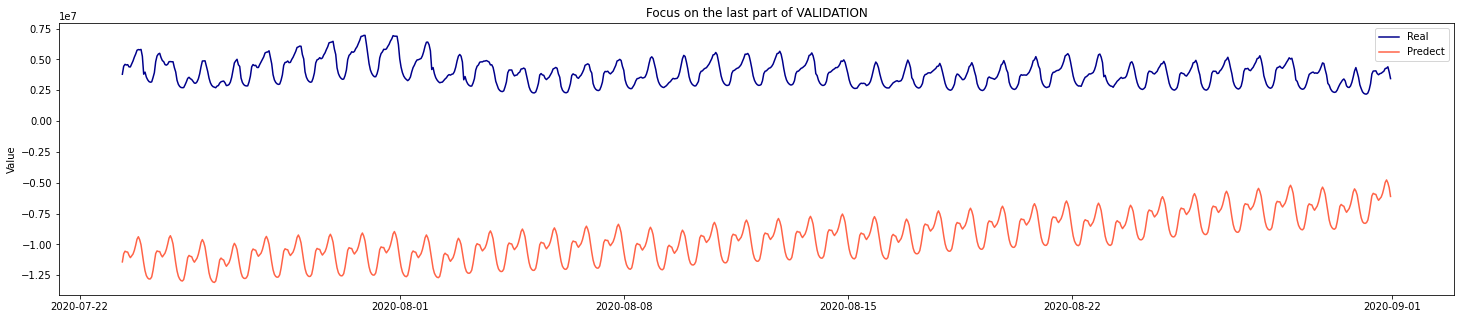

In [ ]:
plot_finale(train, validation)

Considerando il valore del MAE del train e del validation e i grafici soprastanti c'è chiaramente in overfitting.

# Modello senza la trasformazione Box-Cox
Provo quindi lo stesso modello ma con errori arma.

In [ ]:
model2 = TBATS(
    seasonal_periods=[24, 168, 8766],
    use_box_cox=False  # will not use Box-Cox
    )

model2 = model2.fit(train['Value'])

In [ ]:
validation['predicted_val'] = model2.forecast(steps=2952)
train['predicted_train'] = model2.y_hat

In [ ]:
print("MAE train:", mean_absolute_error(train['Value'], train['predicted_train']))
print("MAE validation:", mean_absolute_error(validation['Value'], validation['predicted_val']))

In [ ]:
plot_finale(train, validation)

# Modello con la trasformazione Box-Cox e con la modellazione degli errori ARMA
Provo quindi lo stesso modello con anche la trasformazione Box-Cox

In [ ]:
model3 = TBATS(
    seasonal_periods=[24, 168, 8766])

model3 = model3.fit(train['Value'])

In [ ]:
validation['predicted_val'] = model3.forecast(steps=2952)
train['predicted_train'] = model3.y_hat

In [ ]:
print("MAE train:", mean_absolute_error(train['Value'], train['predicted_train']))
print("MAE validation:", mean_absolute_error(validation['Value'], validation['predicted_val']))

MAE train: 112372.4
MAE validation: 666606.0


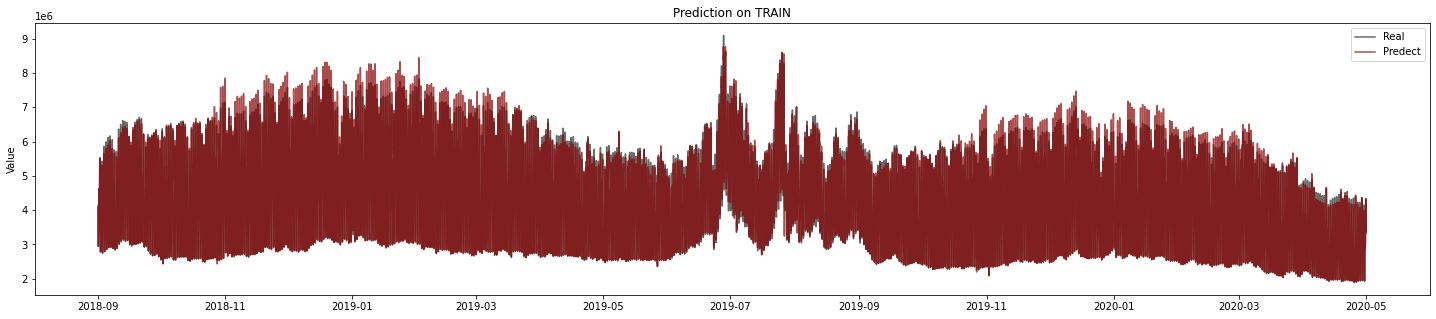

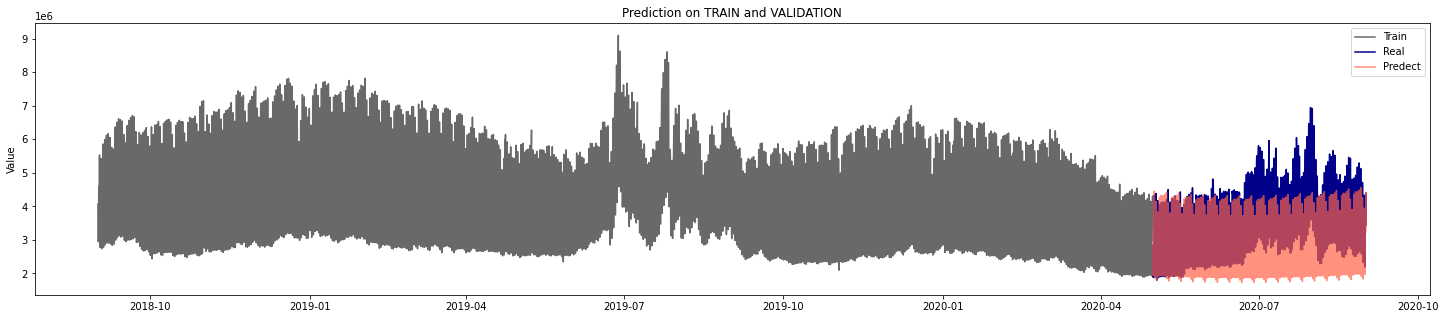

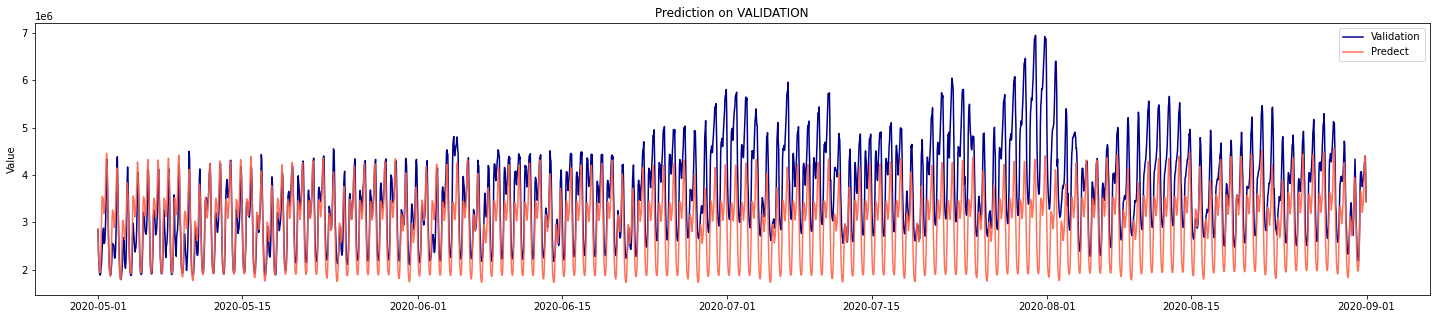

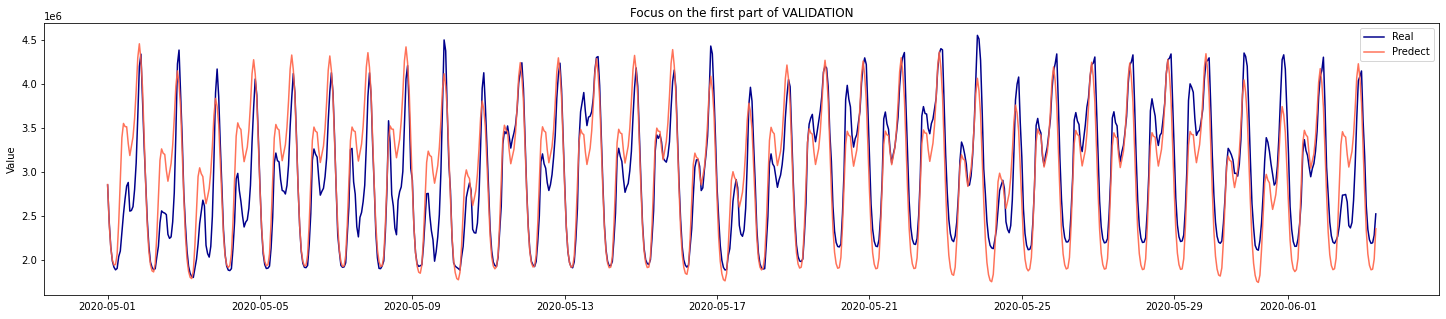

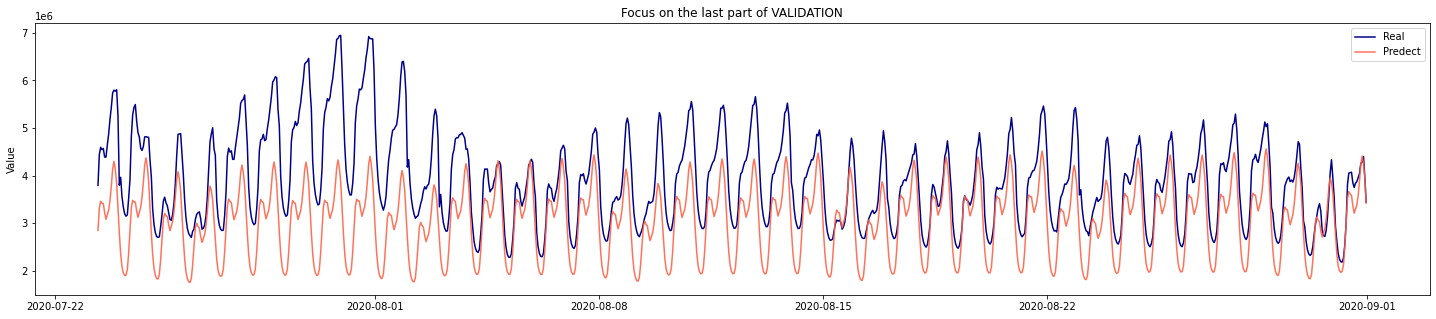

In [ ]:
plot_finale(train, validation)

# Previsioni

In [ ]:
model_tot = TBATS(seasonal_periods=[24, 168, 8766])
model_tot = model_tot.fit(data['Value'])

In [ ]:
forecast = pd.DataFrame({'TBATS':model_tot.forecast(steps=1464), 
                         'Date':pd.date_range(start="2020-09-01 00:00:00", end="2020-10-31 23:00:00", freq='H')})

In [ ]:
forecast.to_csv('TBATS.csv')